## Remove Correlated Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('team_batter_revised.csv')

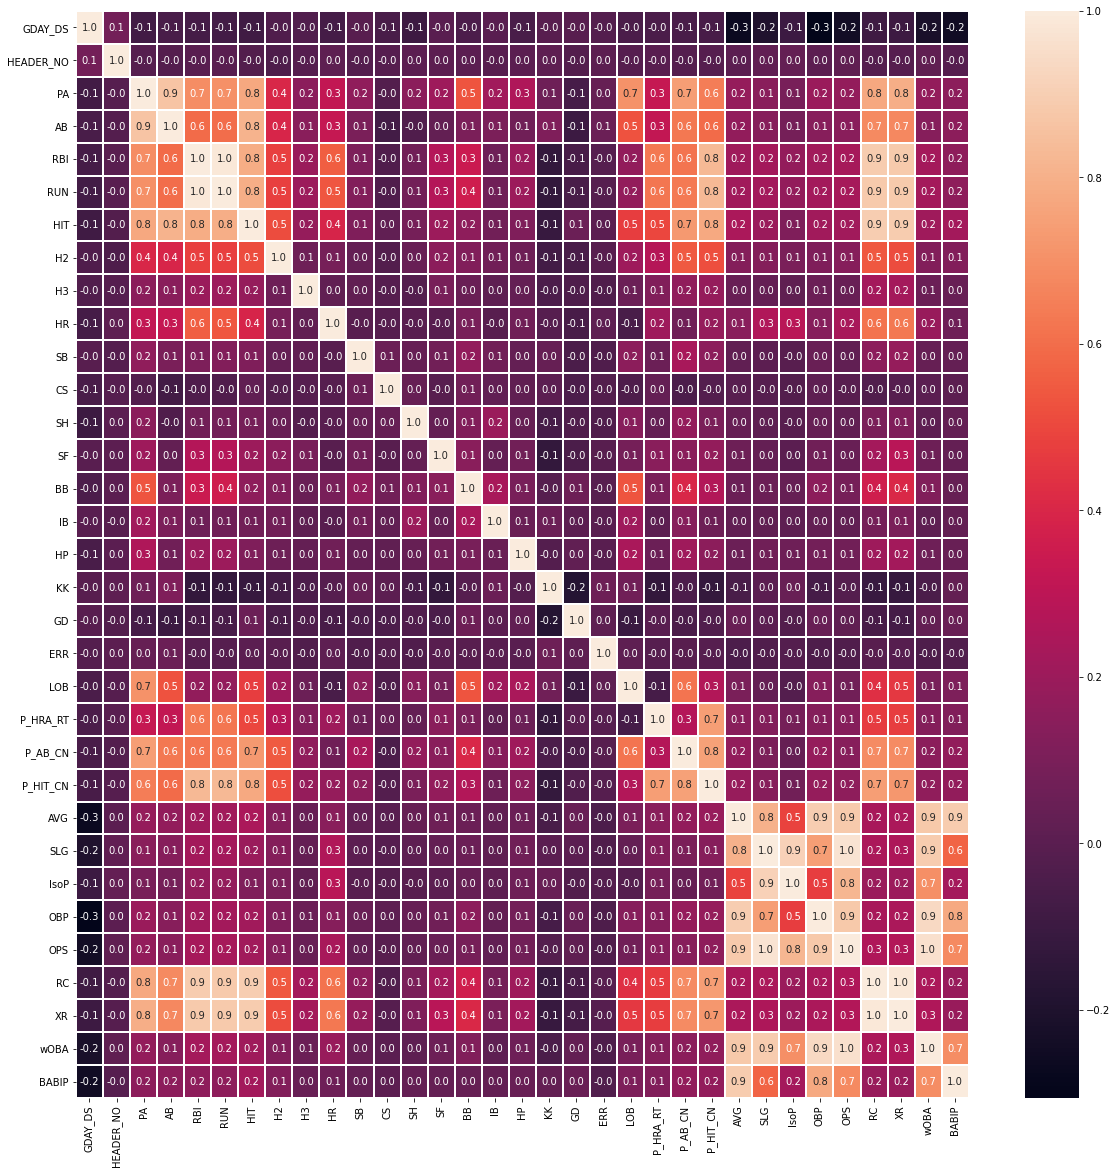

In [3]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidth=1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**Variable Selection Criteria**
1. 상관계수 0.9 이상 변수
2. 기존변수 vs. 파생변수 $\rightarrow$ 기존변수
3. 기존변수 vs. 기존변수 or 파생변수 vs. 파생변수 $\rightarrow$ 주관적 판단

**High-Correlated Variables**
1. PA(타자수) vs. AB(타수) $\rightarrow$ 보류
2. AVG(타율) vs. SLG(장타율), OBP(출루율), OPS(장타율+출루율), wOBA(가중출루율), BABIP $\rightarrow$ AVG(타율)만 보존
3. IsoP(순장타율) 보존
4. RC(득점기여도) vs. XR(득점공헌도) $\rightarrow$ XR(득점공헌도) 제거

In [5]:
data = data.drop(['PA', 'AB', 'RBI', 'RUN', 'HIT', 'SLG', 'OBP', 'OPS', 'XR', 'wOBA', 'BABIP'], axis=1)

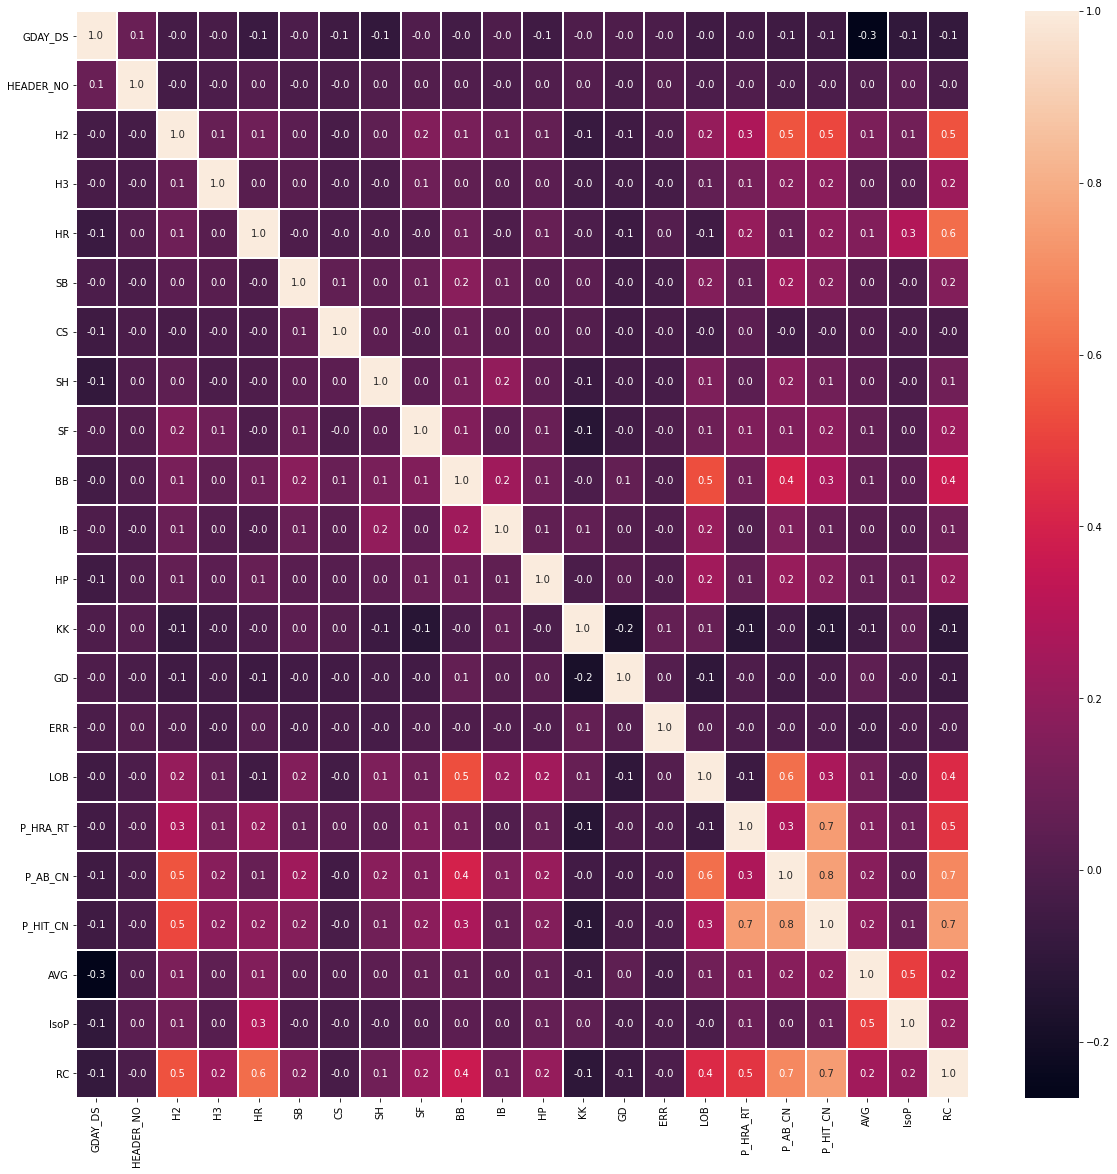

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidth=1)

## Preparation for Lasso

**Remove Variables**

Lasso Regression을 위해 G_ID, GDAY_DS 변수 제거

In [7]:
data = data.drop(['G_ID', 'GDAY_DS'], axis=1)

**Dummy Variables**

T_ID, VS_T_ID, HEADER_NO, TB_SC 더미변수로 변환

In [8]:
data = pd.concat([data, pd.get_dummies(data['T_ID'], prefix='T_ID', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['VS_T_ID'], prefix='VS_T_ID', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['HEADER_NO'], prefix='HEADER_NO', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['TB_SC'], prefix='TB_SC', drop_first=True)], axis=1)
data = data.drop(['T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], axis=1)

**Min-Max Scaling**

나머지 변수들 Min-Max 스케일링

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(data[['H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK',
       'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN', 'AVG', 'IsoP', 'RC']])

MinMaxScaler()

In [12]:
data.iloc[:,:20] = scaler.transform(data[['H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK',
       'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN', 'AVG', 'IsoP', 'RC']])

**Remove Draw Data**

In [13]:
data = data.loc[data['WLS']!='D',].reset_index(drop=True)

In [14]:
data

,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,...,VS_T_ID_LG,VS_T_ID_LT,VS_T_ID_NC,VS_T_ID_OB,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_WO,HEADER_NO_1,HEADER_NO_2,TB_SC_T
0,0.222222,0.000000,0.000,0.000000,0.00,0.6,0.0,0.230769,0.00,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0.222222,0.000000,0.125,0.285714,0.25,0.2,0.0,0.307692,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.333333,0.000000,0.125,0.000000,0.00,0.0,0.0,0.230769,0.00,0.2,...,0,0,1,0,0,0,0,0,0,1
3,0.222222,0.000000,0.250,0.000000,0.00,0.2,0.0,0.384615,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.555556,0.000000,0.125,0.000000,0.00,0.0,0.0,0.000000,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,0.111111,0.000000,0.125,0.000000,0.00,0.2,0.0,0.076923,0.00,0.0,...,0,0,0,0,0,1,0,0,0,1
6330,0.000000,0.333333,0.000,0.000000,0.00,0.0,0.0,0.461538,0.00,0.0,...,0,0,0,1,0,0,0,0,0,0
6331,0.333333,0.000000,0.125,0.285714,0.25,0.0,0.0,0.153846,0.25,0.4,...,0,0,0,0,0,0,0,0,0,1
6332,0.000000,0.000000,0.000,0.000000,0.00,0.0,0.0,0.538462,0.00,0.0,...,0,0,0,0,0,0,1,0,0,0


## Merge with Pitcher Data

In [15]:
data = data.rename({'GD':'HIT_GD', 'KK':'HIT_KK', 'HP':'HIT_HP', 'IB':'HIT_IB', 'BB':'HIT_BB', 'SF':'HIT_SF', 'SH':'HIT_SH',
                   'CS':'HIT_CS', 'SB':'HIT_SB', 'HR':'HIT_HR', 'H3':'HIT_H3', 'H2':'HIT_H2'}, axis=1)

In [16]:
data1 = pd.read_csv('team_pitcher_revised.csv')

In [17]:
data2 = pd.concat([data, data1], axis=1)

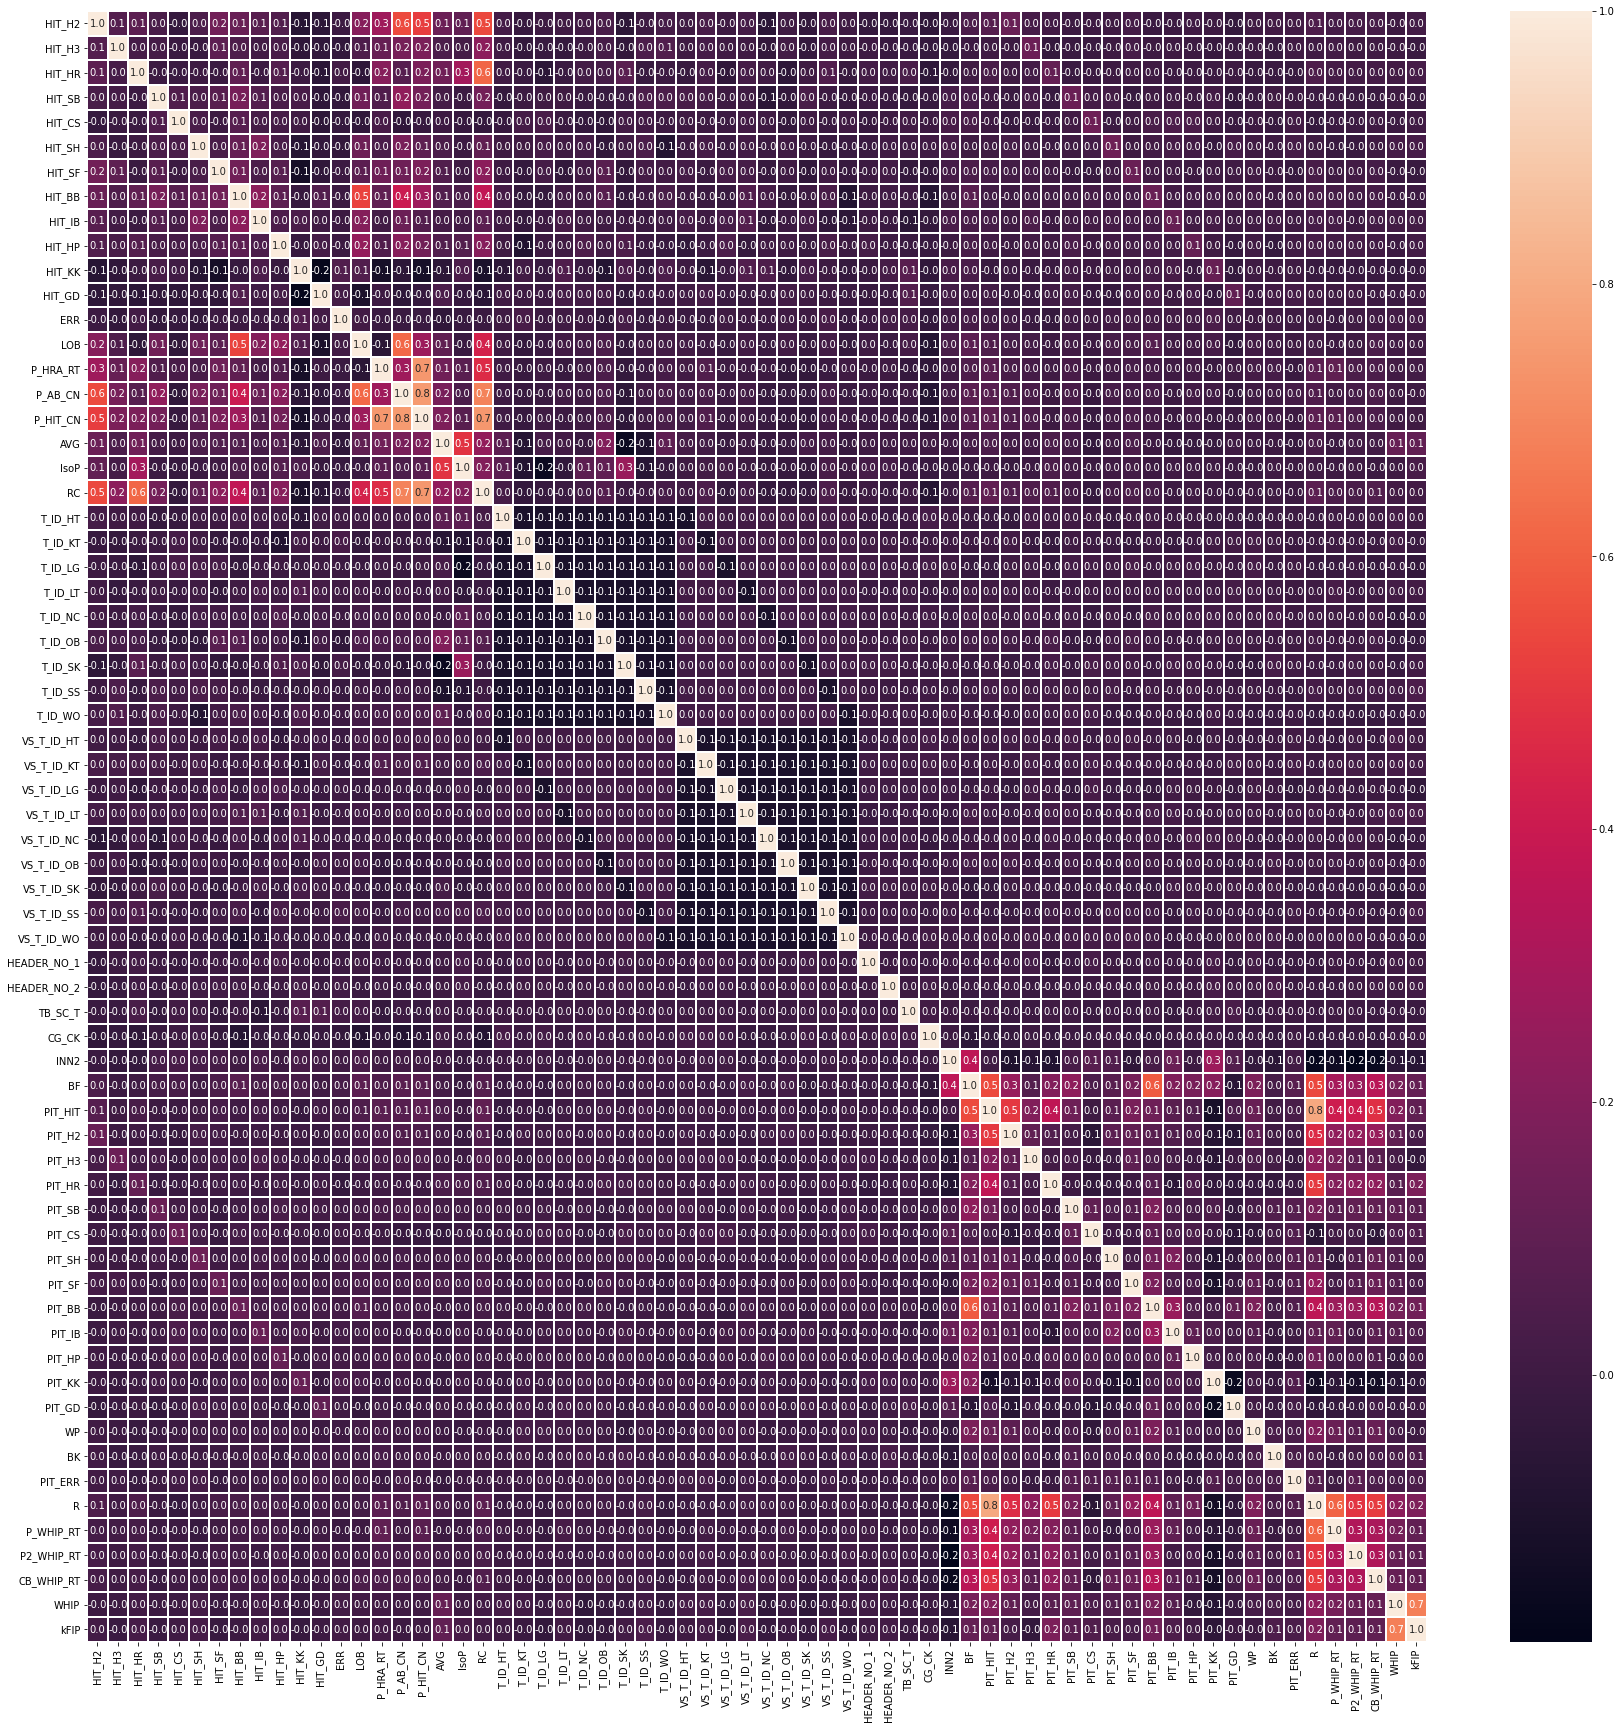

In [18]:
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(data2.corr(), annot=True, fmt='.1f', linewidth=1)

## Variable Importance with RandomForest

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = data2.drop(['WLS'], axis=1)
y = data2['WLS']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(random_state=0)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
rf.score(X_train, y_train)

1.0

In [26]:
rf.score(X_test, y_test)

0.5375418460066954

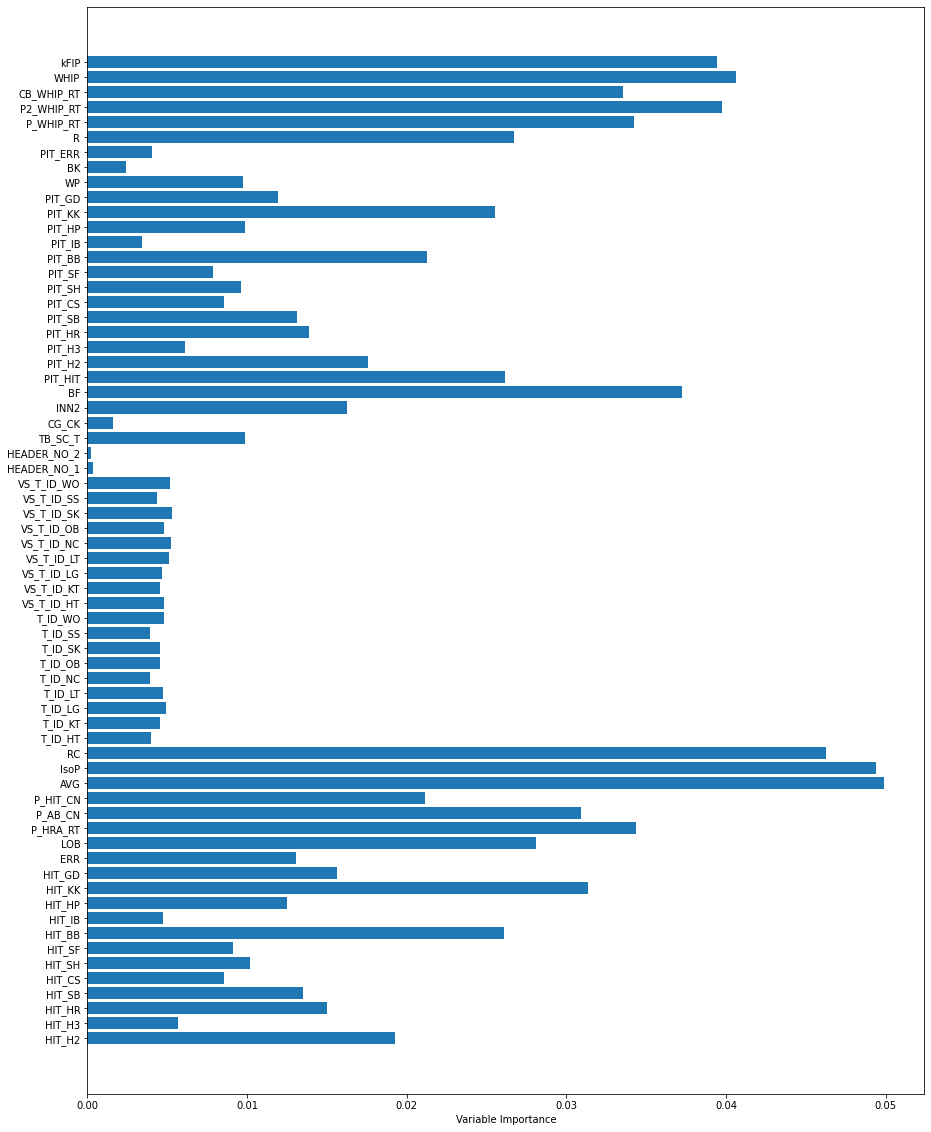

In [27]:
fig, ax = plt.subplots(figsize=(15, 20))
ax.barh(X_test.columns, rf.feature_importances_)
ax.set_xlabel('Variable Importance')
plt.show()

In [28]:
feature_importance = pd.DataFrame(rf.feature_importances_, X_test.columns)

In [29]:
feature_importance[feature_importance[0]>0.01]

,0
HIT_H2,0.019270
HIT_HR,0.015005
HIT_SB,0.013539
HIT_SH,0.010211
HIT_BB,0.026074
HIT_HP,0.012516
HIT_KK,0.031379
HIT_GD,0.015641
ERR,0.013088
LOB,0.028072
